# Loading processed data

In [1]:
# Importing data science libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

from joblib import dump

# Loading processed
df = pd.read_excel('01 Healthcare Premium Prediction/data/processed/processed_premiums_data_young.xlsx')
df.head()

,age,number_of_dependants,income_lakhs,bmi_category,smoking_status,genetical_risk,insurance_plan,annual_premium_amount,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,employment_status_Salaried,employment_status_Self-Employed,total_risk_score
0,0.000000,0.000000,0.989899,0.666667,0.5,0.8,0.5,13365,1,0,0,0,1,0,1,0.428571
1,0.571429,0.000000,0.020202,0.000000,0.0,0.6,0.5,11050,0,1,0,0,1,0,0,0.000000
2,0.428571,0.000000,0.969697,0.333333,0.5,0.8,0.5,11857,0,0,1,0,1,1,0,0.000000
3,1.000000,0.000000,0.141414,0.333333,0.0,0.4,0.0,5684,1,0,1,0,1,0,0,0.000000
4,0.285714,0.666667,0.131313,0.666667,0.0,0.2,0.0,5712,1,0,1,0,1,0,0,0.000000


# Generating Train-Test Split

In [2]:
# Split the data into X (input features) & y (target features)
X = df.drop(columns= ['annual_premium_amount'], axis= 1)
y = df['annual_premium_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 69, shuffle= True)

print(f"No. of rows in X_train: {X_train.shape[0]:,}")
print(f"No. of rows in X_test : {X_test.shape[0]:,}")

No. of rows in X_train: 14,060
No. of rows in X_test : 6,026


# Model Development

## Linear Regression

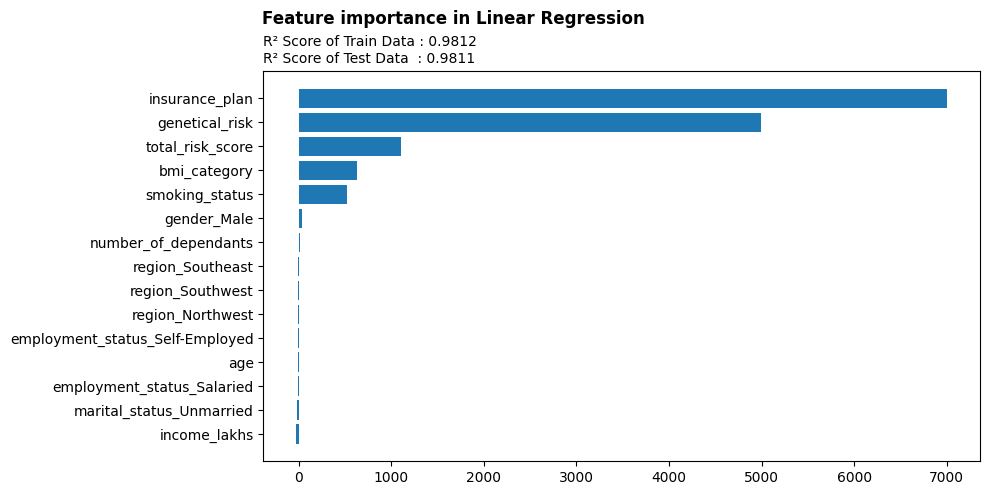

In [3]:
# Developing Linear Regression Model

model_lr = LinearRegression()
model_lr.fit(X= X_train, y= y_train)
score_lr = model_lr.score(X_test, y_test)

# Feature importance in Linear Regression
'''
In linear regression, feature importance refers to the extent to which each independent variable (feature) contributes to predicting the dependent variable (target). 
A coefficient (also known as a weight or parameter estimate) is assigned to each independent variable. 
These coefficients represent the estimated change in the dependent variable for a one-unit increase in the independent variable, 
assuming all other independent variables are held constant.
'''

coef_df = pd.DataFrame(
    data= model_lr.coef_, 
    index= X_train.columns, 
    columns= ['feature_imp']
).sort_values(by= 'feature_imp')

plt.figure(figsize=(10,5))
plt.barh(
    y= coef_df.index,
    width= coef_df['feature_imp']
)
plt.suptitle('Feature importance in Linear Regression', 
             x=0.267, ha='left', fontsize=12, fontweight='bold')
plt.title(
    f"R² Score of Train Data : {model_lr.score(X_train, y_train):.4f}\n"
    f"R² Score of Test Data  : {model_lr.score(X_test, y_test):.4f}",
    x=0.0, ha='left', fontsize=10
)
plt.tight_layout(rect=[0, 0, 1, 1.025])
plt.show()

## Regularization Regression

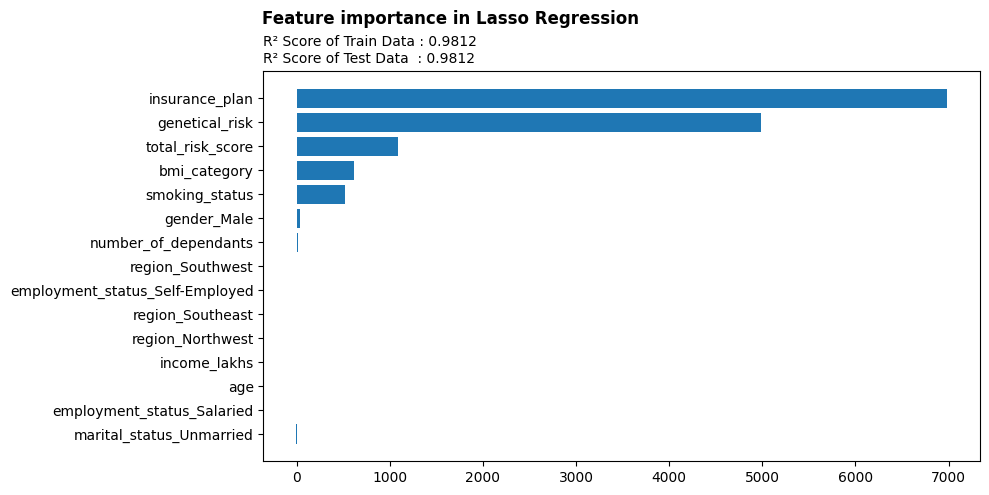

In [4]:
# Developing Lasso Regression Model

model_la = Lasso()
model_la.fit(X= X_train, y= y_train)
score_la = model_la.score(X_test, y_test)

coef_df = pd.DataFrame(
    data= model_la.coef_, 
    index= X_train.columns, 
    columns= ['feature_imp']
).sort_values(by= 'feature_imp')

plt.figure(figsize=(10,5))
plt.barh(
    y= coef_df.index,
    width= coef_df['feature_imp']
)
plt.suptitle('Feature importance in Lasso Regression', 
             x=0.267, ha='left', fontsize=12, fontweight='bold')
plt.title(
    f"R² Score of Train Data : {model_la.score(X_train, y_train):.4f}\n"
    f"R² Score of Test Data  : {model_la.score(X_test, y_test):.4f}",
    x=0.0, ha='left', fontsize=10
)
plt.tight_layout(rect=[0, 0, 1, 1.025])
plt.show()

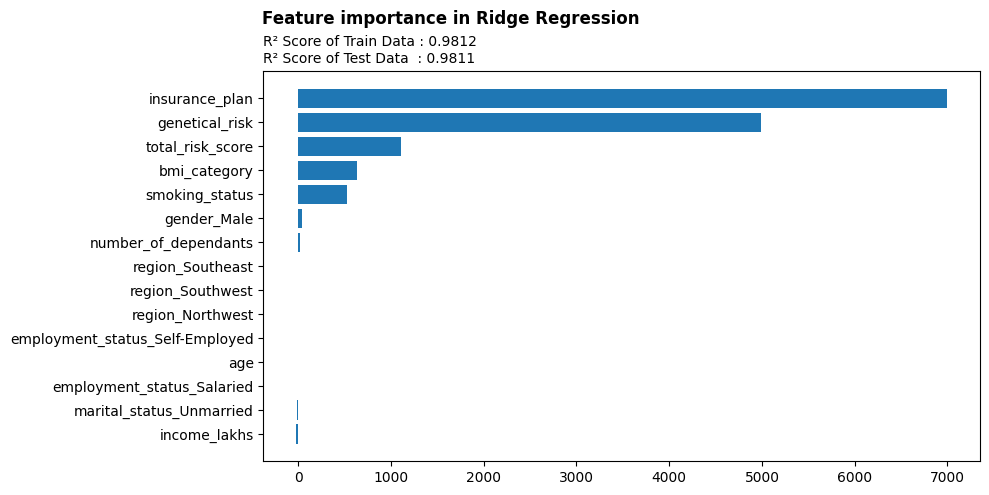

In [5]:
# Developing Ridge Regression Model

model_r = Ridge()
model_r.fit(X= X_train, y= y_train)
score_r = model_r.score(X_test, y_test)

coef_df = pd.DataFrame(
    data= model_r.coef_, 
    index= X_train.columns, 
    columns= ['feature_imp']
).sort_values(by= 'feature_imp')

plt.figure(figsize=(10,5))
plt.barh(
    y= coef_df.index,
    width= coef_df['feature_imp']
)
plt.suptitle('Feature importance in Ridge Regression', 
             x=0.267, ha='left', fontsize=12, fontweight='bold')
plt.title(
    f"R² Score of Train Data : {model_r.score(X_train, y_train):.4f}\n"
    f"R² Score of Test Data  : {model_r.score(X_test, y_test):.4f}",
    x=0.0, ha='left', fontsize=10
)
plt.tight_layout(rect=[0, 0, 1, 1.025])
plt.show()

## Decision Tree Regression

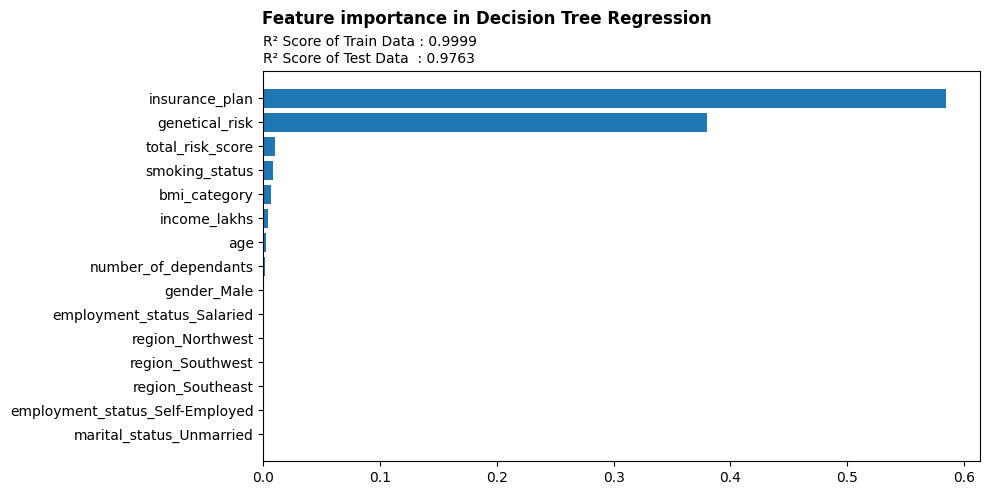

In [6]:
# Developing Decision Tree Regression Model

model_dtr = DecisionTreeRegressor()
model_dtr.fit(X= X_train, y= y_train)
score_dtr = model_dtr.score(X_test, y_test)

coef_df = pd.DataFrame(
    data= model_dtr.feature_importances_, #different method 
    index= X_train.columns, 
    columns= ['feature_imp']
).sort_values(by= 'feature_imp')

plt.figure(figsize=(10,5))
plt.barh(
    y= coef_df.index,
    width= coef_df['feature_imp']
)
plt.suptitle('Feature importance in Decision Tree Regression', 
             x=0.267, ha='left', fontsize=12, fontweight='bold')
plt.title(
    f"R² Score of Train Data : {model_dtr.score(X_train, y_train):.4f}\n"
    f"R² Score of Test Data  : {model_dtr.score(X_test, y_test):.4f}",
    x=0.0, ha='left', fontsize=10
)
plt.tight_layout(rect=[0, 0, 1, 1.025])
plt.show()

## Random Forest Regression

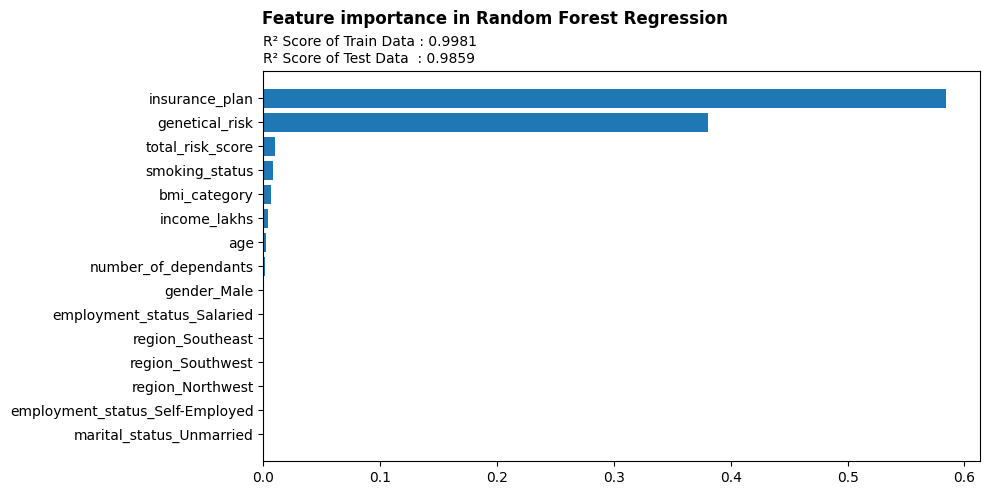

In [7]:
# Developing Random Forest Regression Model

model_rf = RandomForestRegressor()
model_rf.fit(X= X_train, y= y_train)
score_rf = model_rf.score(X_test, y_test)

coef_df = pd.DataFrame(
    data= model_rf.feature_importances_, #different method 
    index= X_train.columns, 
    columns= ['feature_imp']
).sort_values(by= 'feature_imp')

plt.figure(figsize=(10,5))
plt.barh(
    y= coef_df.index,
    width= coef_df['feature_imp']
)
plt.suptitle('Feature importance in Random Forest Regression', 
             x=0.267, ha='left', fontsize=12, fontweight='bold')
plt.title(
    f"R² Score of Train Data : {model_rf.score(X_train, y_train):.4f}\n"
    f"R² Score of Test Data  : {model_rf.score(X_test, y_test):.4f}",
    x=0.0, ha='left', fontsize=10
)
plt.tight_layout(rect=[0, 0, 1, 1.025])
plt.show()

## XGBoost Regression

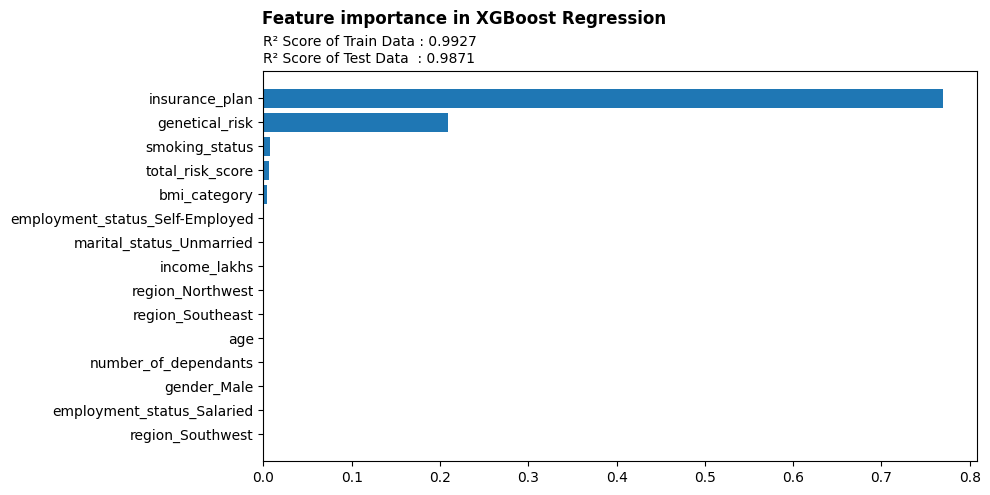

In [8]:
# Developing XGBoost Regression Model

model_xgb = XGBRegressor()
model_xgb.fit(X= X_train, y= y_train)
score_xgb = model_xgb.score(X_test, y_test)

coef_df = pd.DataFrame(
    data= model_xgb.feature_importances_, #different method 
    index= X_train.columns, 
    columns= ['feature_imp']
).sort_values(by= 'feature_imp')

plt.figure(figsize=(10,5))
plt.barh(
    y= coef_df.index,
    width= coef_df['feature_imp']
)
plt.suptitle('Feature importance in XGBoost Regression', 
             x=0.267, ha='left', fontsize=12, fontweight='bold')
plt.title(
    f"R² Score of Train Data : {model_xgb.score(X_train, y_train):.4f}\n"
    f"R² Score of Test Data  : {model_xgb.score(X_test, y_test):.4f}",
    x=0.0, ha='left', fontsize=10
)
plt.tight_layout(rect=[0, 0, 1, 1.025])
plt.show()

Out of all the models, XGBoost has better performance without the requirement of hyperparameter fine tuning aand therefore we can move forward with it.

### Hyperparameter Fine tuning

Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50}


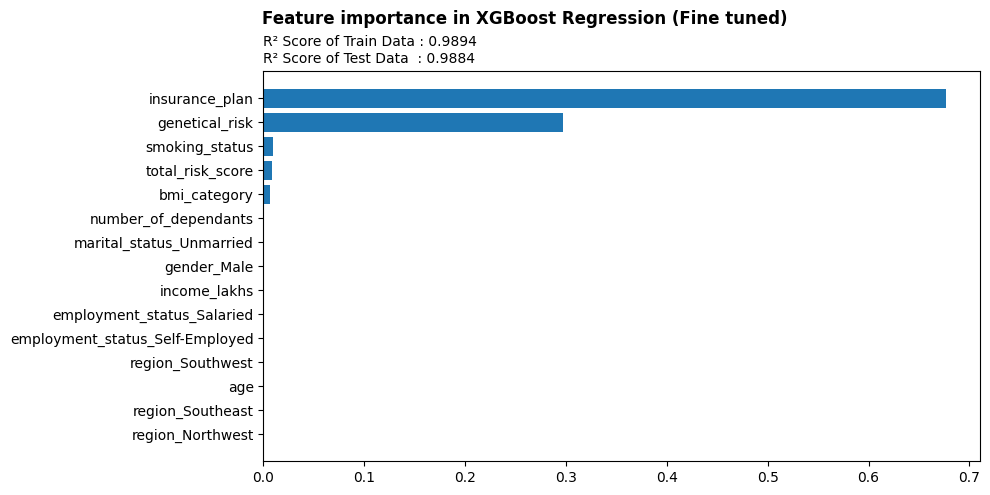

In [9]:
# Using GridSearchCV to find best estimator parameters
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gscv = GridSearchCV(
    estimator= XGBRegressor(),
    param_grid= param_grid,
    cv= 5,
    scoring= 'r2'
)
estimator_details = gscv.fit(X=X_train, y= y_train)

best_estimator = estimator_details.best_estimator_
print(f'Best Parameters: {estimator_details.best_params_}')

coef_df = pd.DataFrame(
    data= best_estimator.feature_importances_, #different method 
    index= X_train.columns, 
    columns= ['feature_imp']
).sort_values(by= 'feature_imp')

plt.figure(figsize=(10,5))
plt.barh(
    y= coef_df.index,
    width= coef_df['feature_imp']
)
plt.suptitle('Feature importance in XGBoost Regression (Fine tuned)', 
             x=0.267, ha='left', fontsize=12, fontweight='bold')
plt.title(
    f"R² Score of Train Data : {best_estimator.score(X_train, y_train):.4f}\n"
    f"R² Score of Test Data  : {best_estimator.score(X_test, y_test):.4f}",
    x=0.0, ha='left', fontsize=10
)
plt.tight_layout(rect=[0, 0, 1, 1.025])
plt.show()

# Exporting Best Model

In [10]:
dump(
    value= best_estimator,
    filename= '01 Healthcare Premium Prediction/models/model_young.joblib'
)

['01 Healthcare Premium Prediction/models/model_young.joblib']